[//]: # (Image References)

[image1]: ./images/skin_disease_classes.png "Skin Disease Classes"
[image2]: ./images/cat_1.jpeg "Category 1 Rankings"
[image3]: ./images/cat_2.jpeg "Category 2 Rankings"
[image4]: ./images/cat_3.png "Category 3 Rankings"
[image5]: ./images/sample_ROC_curve.png "Sample ROC curve"
[image6]: ./images/sample_confusion_matrix.png "Sample confusion matrix"

# Dermatologist AI

## Introduction

In this mini project, you will design an algorithm that can visually diagnose [melanoma](http://www.skincancer.org/skin-cancer-information/melanoma), the deadliest form of skin cancer.  In particular, your algorithm will distinguish this malignant skin tumor from two types of benign lesions ([nevi](http://missinglink.ucsf.edu/lm/dermatologyglossary/nevus.html) and [seborrheic keratoses](https://www.aad.org/public/diseases/bumps-and-growths/seborrheic-keratoses)). 

The data and objective are pulled from the [2017 ISIC Challenge on Skin Lesion Analysis Towards Melanoma Detection](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a).  As part of the challenge, participants were tasked to design an algorithm to diagnose skin lesion images as one of three different skin diseases (melanoma, nevus, or seborrheic keratosis).  In this project, you will create a model to generate your own predictions.

![Skin Disease Classes][image1]

## Getting Started

1. Clone the [repository](https://github.com/udacity/dermatologist-ai) and create a `data/` folder to hold the dataset of skin images.  
```text
git clone https://github.com/udacity/dermatologist-ai.git
mkdir data; cd data
```
2. Create folders to hold the training, validation, and test images.
```text
mkdir train; mkdir valid; mkdir test
```
3. Download and unzip the [training data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip) (5.3 GB).

4. Download and unzip the [validation data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip) (824.5 MB).

5. Download and unzip the [test data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip) (5.1 GB).

6. Place the training, validation, and test images in the `data/` folder, at `data/train/`, `data/valid/`, and `data/test/`, respectively.  Each folder should contain three sub-folders (`melanoma/`, `nevus/`, `seborrheic_keratosis/`), each containing representative images from one of the three image classes.

You are free to use any coding environment of your choice to solve this mini project!  In order to rank your results, you need only use a pipeline that culminates in a CSV file containing your test predictions.

## Create a Model

Use the training and validation data to train a model that can distinguish between the three different image classes.  (_After training, you will use the test images to gauge the performance of your model._)

If you would like to read more about some of the algorithms that were successful in this competition, please read [this article](https://arxiv.org/pdf/1710.05006.pdf) that discusses some of the best approaches.  A few of the corresponding research papers appear below.
- Matsunaga K, Hamada A, Minagawa A, Koga H. [“Image Classification of Melanoma, Nevus and Seborrheic Keratosis by Deep Neural Network Ensemble”](https://arxiv.org/ftp/arxiv/papers/1703/1703.03108.pdf). International Skin Imaging Collaboration (ISIC) 2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). 
- Daz IG. [“Incorporating the Knowledge of Dermatologists to Convolutional Neural Networks for the Diagnosis of Skin Lesions”](https://arxiv.org/pdf/1703.01976.pdf). International Skin Imaging Collaboration (ISIC) 2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). ([**github**](https://github.com/igondia/matconvnet-dermoscopy))
- Menegola A, Tavares J, Fornaciali M, Li LT, Avila S, Valle E. [“RECOD Titans at ISIC Challenge 2017”](https://arxiv.org/abs/1703.04819). International Skin Imaging Collaboration (ISIC)  2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). ([**github**](https://github.com/learningtitans/isbi2017-part3))

While the original challenge provided additional data (such as the gender and age of the patients), we only provide the image data to you.  If you would like to download this additional patient data, you may do so at the competition [website](https://challenge.kitware.com/#phase/5840f53ccad3a51cc66c8dab).

All three of the above teams increased the number of images in the training set with additional data sources.  If you'd like to expand your training set, you are encouraged to begin with the [ISIC Archive](https://isic-archive.com/#images).

## Evaluation

Inspired by the ISIC challenge, your algorithm will be ranked according to three separate categories.

#### Category 1: ROC AUC for Melanoma Classification

In the first category, we will gauge the ability of your CNN to distinguish between malignant melanoma and the benign skin lesions (nevus, seborrheic keratosis) by calculating the area under the receiver operating characteristic curve ([ROC AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)) corresponding to this binary classification task.

If you are unfamiliar with ROC (Receiver Operating Characteristic) curves and would like to learn more, you can check out the documentation in [scikit-learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) or read [this Wikipedia article](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

The top scores (from the ISIC competition) in this category can be found in the image below.

![Category 1 Rankings][image2]

#### Category 2: ROC AUC for Melanocytic Classification

All of the skin lesions that we will examine are caused by abnormal growth of either [melanocytes](https://en.wikipedia.org/wiki/Melanocyte) or [keratinocytes](https://en.wikipedia.org/wiki/Keratinocyte), which are two different types of epidermal skin cells.  Melanomas and nevi are derived from melanocytes, whereas seborrheic keratoses are derived from keratinocytes. 

In the second category, we will test the ability of your CNN to distinuish between melanocytic and keratinocytic skin lesions by calculating the area under the receiver operating characteristic curve ([ROC AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)) corresponding to this binary classification task.

The top scores in this category (from the ISIC competition) can be found in the image below.

![Category 2 Rankings][image3]

#### Category 3: Mean ROC AUC

In the third category, we will take the average of the ROC AUC values from the first two categories.

The top scores in this category (from the ISIC competition) can be found in the image below.

![Category 3 Rankings][image4]

## Getting your Results

Once you have trained your model, create a CSV file to store your test predictions.  Your file should have exactly 600 rows, each corresponding to a different test image, **plus** a header row.  You can find an example submission file (`sample_submission.csv`) in the repository.

Your file should have exactly 3 columns:
- `Id` - the file names of the test images (in the **same** order as the sample submission file)
- `task_1` - the model's predicted probability that the image (at the path in `Id`) depicts melanoma
- `task_2` - the model's predicted probability that the image (at the path in `Id`) depicts seborrheic keratosis

Once the CSV file is obtained, you will use the `get_results.py` file to score your submission.  To set up the environment to run this file, you need to create (and activate) an environment with Python 3.5 and a few pip-installable packages:
```text
conda create --name derm-ai python=3.5
source activate derm-ai
pip install -r requirements.txt
```

Once you have set up the environment, run the following command to see how the sample submission performed:
```text
python get_results.py sample_predictions.csv
```

Check the terminal output for the scores obtained in the three categories:
```text
Category 1 Score: 0.526
Category 2 Score: 0.606
Category 3 Score: 0.566
```

The corresponding **ROC curves** appear in a pop-up window, along with the **confusion matrix** corresponding to melanoma classification.  

![Sample ROC curve][image5]
![Sample confusion matrix][image6]

The code for generating the confusion matrix assumes that the threshold for classifying melanoma is set to 0.5.  To change this threshold, you need only supply an additional command-line argument when calling the `get_results.py` file.  For instance, to set the threshold at 0.4, you need only run:
```text
python get_results.py sample_predictions.csv 0.4
```

To test **your own** submission, change the code to instead include the path to **your** CSV file.


In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

import sklearn
import os
import random

import tensorflow as tf

/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

# step0: add data to csv(include file path and classification)

In [2]:
def read_file_log(pathName, cvsName):
    with open(cvsName, 'w',encoding='utf-8') as f_cvs:
        csv_writer = csv.writer(f_cvs)
        #csv_writer.writerow(['fileNale', 'label'])
        
        all_dirs =  os.listdir(pathName)
        for dir_name in all_dirs:
            all_files =  os.listdir(pathName+dir_name)
            if dir_name == 'melanoma':
                label = 0
            elif dir_name == 'nevus':
                label = 1
            elif dir_name == 'seborrheic_keratosis':
                label = 2
            
            for file_name in all_files:
                child = os.path.join('%s/%s/%s' % (pathName, dir_name,file_name))
                ##print child.decode('gbk') # .decode('gbk')是解决中文显示乱码问题
                #print(child,label)
                csv_writer.writerow([child, label])

In [3]:
train_log_file = './data/train_log.csv'
valid_log_file = './data/valid_log.csv'
test_log_file = './data/test_log.csv'

read_file_log('./data/train/',train_log_file)
read_file_log('./data/valid/',valid_log_file)
read_file_log('./data/test/',test_log_file)

['./data/train//seborrheic_keratosis/ISIC_0012880.jpg', '2']
['./data/valid//melanoma/ISIC_0014931.jpg', '0']
./data/test//nevus/ISIC_0012837.jpg
(4439, 6648, 3)
(240, 320, 3)

Training Set:   2000 samples
Valid Set: 150 samples
Test Set:       600 samples


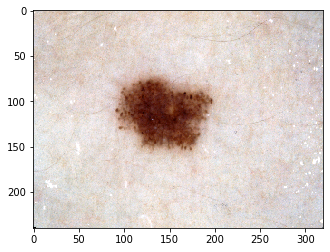

In [4]:
def read_csv(file):
    with open(file) as csvfile:
        reader = csv.reader(csvfile)
        samples = []
        for line in reader:
            samples.append(line)
    
    return samples


# get data
train_samples = read_csv(train_log_file)
valid_samples = read_csv(valid_log_file)
test_samples = read_csv(test_log_file)

random.shuffle(train_samples)
random.shuffle(valid_samples)
random.shuffle(test_samples)

print(train_samples[0])
print(valid_samples[0])
print(test_samples[0][0])
#current_image=cv2.imread(test_samples[2][0])
current_image=plt.imread(test_samples[2][0])
print(current_image.shape)
new_img = cv2.resize(current_image,(320,240),interpolation=cv2.INTER_CUBIC)
print(new_img.shape)
plt.imshow(new_img)

assert(len(train_samples) == len(train_samples))
#assert(len(X_valid) == len(y_valid))
#assert(len(X_test) == len(y_test))

print()
print("Training Set:   {} samples".format(len(train_samples)))
print("Valid Set: {} samples".format(len(valid_samples)))
print("Test Set:       {} samples".format(len(test_samples)))


In [5]:
from keras.utils.np_utils import to_categorical

def generator(samples, batch_size=64):
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        random.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            #print("num_samples,offset,batch_size:",num_samples,offset,batch_size)
            batch_samples = samples[offset:offset+batch_size]

            images = []
            labels = []
            for batch_sample in batch_samples:
                #image_count*3
                current_path, current_label = batch_sample[0],batch_sample[1]

                #current_image=matplotlib.pyplot.imread(current_path)
                current_image=cv2.imread(current_path)
                images.append(cv2.resize(current_image,(320,240),interpolation=cv2.INTER_CUBIC))
                labels.append(current_label)
            #print(labels)


            X_train = np.array(images)
            #print(labels)
            #y = to_categorical(labels,3)
            labels_3= to_categorical(labels,num_classes=3)

            yield (X_train, labels_3)

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda,Cropping2D
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
import matplotlib.pyplot as plt
import math

# Set our batch size
BATCH_SIZE = 64
N_CLASSES = 3
EPOCHS = 20

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=BATCH_SIZE)
validation_generator = generator(valid_samples, batch_size=BATCH_SIZE)
#print(validation_generator[0][1])

# step3: design the Net Architecture

use the Net Architecture by NVIDA'S autonomous vehicle team

batch_size = 32  180s/epoch

In [8]:
model = Sequential()

#normalizing and mean centering the data
model.add(Lambda(lambda x: x/255.0-0.5,input_shape=(240,320,3)))

#crop the dirty data
#model.add(Cropping2D(cropping=((50,20),(0,0))))

#using the Net architecture published by the autonomous vehicle team at NVIDIA

model.add(Convolution2D(filters=16,kernel_size=(3,3),strides=(2,2), activation='relu', name='conv1_1'))
#model.add(MaxPooling2D((2)))
model.add(Dropout(0.5))

model.add(Convolution2D(32,(3,3), activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(64,(3,3), activation='relu', name='conv1_3'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(128,(3,3), activation='relu', name='conv1_4'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,activation='softmax'))

#model.summary()

In [9]:
# step4, train
from datetime import  datetime

epoch_start = datetime.now()

from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='classify.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=20)
history_object = model.fit_generator(train_generator, \
            steps_per_epoch=math.ceil(len(train_samples)/BATCH_SIZE), \
            validation_data=validation_generator, \
            validation_steps=math.ceil(len(valid_samples)/BATCH_SIZE), \
            callbacks=[checkpointer],\
            epochs=EPOCHS, verbose=1)

delta = datetime.now()-epoch_start

print("Train model elapsed time:{}(s)".format(delta.seconds))


Epoch 1/20
32/32 [==============================] - 194s 6s/step - loss: 0.9656 - accuracy: 0.6620 - val_loss: 0.8610 - val_accuracy: 0.5200

Epoch 00001: val_loss improved from inf to 0.86096, saving model to classify.weights.best.hdf5
Epoch 2/20
32/32 [==============================] - 188s 6s/step - loss: 0.8360 - accuracy: 0.6860 - val_loss: 0.9215 - val_accuracy: 0.5200

Epoch 00002: val_loss did not improve from 0.86096
Epoch 3/20
32/32 [==============================] - 188s 6s/step - loss: 0.8196 - accuracy: 0.6845 - val_loss: 0.9065 - val_accuracy: 0.5133

Epoch 00003: val_loss did not improve from 0.86096
Epoch 4/20
32/32 [==============================] - 188s 6s/step - loss: 0.7811 - accuracy: 0.6880 - val_loss: 0.8546 - val_accuracy: 0.5200

Epoch 00004: val_loss improved from 0.86096 to 0.85460, saving model to classify.weights.best.hdf5
Epoch 5/20
32/32 [==============================] - 188s 6s/step - loss: 0.7523 - accuracy: 0.6890 - val_loss: 1.2678 - val_accuracy: 0

In [10]:
print(model.metrics_names)

['loss', 'accuracy']


model = Sequential()

#normalizing and mean centering the data
model.add(Lambda(lambda x: x/255.0-0.5,input_shape=(240,320,3)))

#crop the dirty data
#model.add(Cropping2D(cropping=((50,20),(0,0))))

#using the Net architecture published by the autonomous vehicle team at NVIDIA
model.add(Convolution2D(filters=32,kernel_size=(3,3),strides=(2,2), activation='relu', name='conv1_1'))
model.add(Dropout(0.5))
model.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(2,2), activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(2,2), activation='relu', name='conv1_3'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(2,2), activation='relu', name='conv2_1'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3,activation='sigmoid'))

#model.summary()

## save keras's model

In [11]:
### print the keys contained in the history object
print(history_object.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


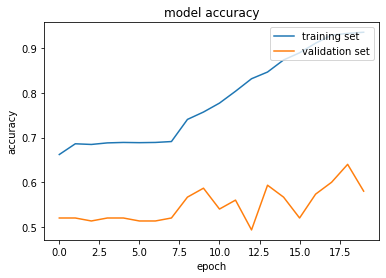

In [12]:
### plot the training and validation loss for each epoch
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.savefig("./error_loss.png")
plt.show()

In [15]:
for batch_sample in test_samples:
    #image_count*3
    images = []
    labels = []
    current_path, current_label = batch_sample[0],batch_sample[1]

    current_image=cv2.imread(current_path)
    images.append(cv2.resize(current_image,(320,240),interpolation=cv2.INTER_CUBIC))
    labels.append(current_label)



X_test = np.array(images)
labels_test= to_categorical(labels,num_classes=3)

print("Testing")
metrics = model.evaluate(X_test, labels_test)



Testing
1/1 [==============================] - 0s 6ms/step
loss: 3.3568406105041504
accuracy: 0.0


In [16]:
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

loss: 3.3568406105041504
accuracy: 0.0
